# ValidMind Introduction for Model Developers

As a model developer, learn how the end-to-end documentation process works based on common scenarios you encounter in model development settings.

As a prerequisite, a model documentation template must be available on the platform. You can [view the available templates](https://docs.validmind.com/guide/swap-documentation-templates.html#view-current-templates) to see what has been defined on the platform.

This notebook uses a binary classification model as an example, but the same principles shown here apply to other model types.

<a id='toc1_'></a>

## Overview of the notebook

**1. Initializing the ValidMind Developer Framework**

ValidMind’s developer framework provides a rich collection of documentation tools and test suites, from documenting descriptions of datasets to validation and testing of models using a variety of open-source testing frameworks.

**2. Start the model development process with raw data, run out-of-the box tests, and add evidence to model documentation**

Learn how to access ValidMind's test repository of individual tests that you will use as building blocks to ensure a model is being built appropriately. The goal is to show how to run tests, investigate results, and add tests results or evidence to the documentation.

For a full list of out-of-the-box tests, see [Test descriptions](https://docs.validmind.com/guide/test-descriptions.html) or try the interactive [Test sandbox](https://docs.validmind.com/guide/test-sandbox.html).

**3. Implementing custom tests**

Usually, model developers have their own custom tests and it is important to include this within the model documentation. We will show you how to include custom tests and then how they can be added to documentation as additional evidence.

**4. Finalize testing and documentation**

Learn how you can ensure that model documentation includes custom tests and how to make test configuration changes that apply to all tests in the model documentation template. At the end of this section you should have a fully documented model ready for review.


## Contents

- [Overview of the notebook](#toc1_)
- [About ValidMind](#toc2_)
  - [Before you begin](#toc2_1_)
  - [New to ValidMind?](#toc2_2_)
  - [Key concepts](#toc2_3_)
- [1. Initializing the ValidMind Developer Framework](#toc4_)
  - [Install the client library](#toc4_1_)
  - [Register a new model in ValidMind UI and initialize the client library](#toc4_2_)
  - [Verify & preview the documentation template](#toc4_3_)
- [2. Start the model development process with raw data, run out-of-the box tests, and add evidence to model documentation](#toc5_)
  - [Initialize the ValidMind datasets](#toc5_1_)
  - [Run some tabular data tests](#toc5_2_)
  - [Utilize test output](#toc5_3_)
  - [Documenting the results based on two datasets](#toc5_4_)
    - [Run `run_documentation_tests()` using `vm_raw_dataset_preprocessed` as input](#toc5_4_1_)
    - [Log the individual result of the high correlation test that used `vm_balanced_raw_dataset` (that had a highly correlated `Age` column) as input](#toc5_4_2_)
  - [Add individual test results to model documentation](#toc5_5_)
  - [Model Testing](#toc5_6_)
  - [Initialize model evaluation objects and assigning predictions](#toc5_7_)
  - [Run the model evaluation tests](#toc5_8_)
- [3. Implementing custom tests](#toc6_)
  - [Create a confusion matrix plot](#toc6_1_)
  - [Add parameters to custom tests](#toc6_2_)
  - [Pass parameters to custom tests](#toc6_3_)
  - [Log the confusion matrix results](#toc6_4_)
  - [Using external test providers](#toc6_5_)
    - [Create a folder of custom tests from existing inline tests](#toc6_5_1_)
    - [Save an inline test to a file](#toc6_5_2_)
    - [Define and register a `LocalTestProvider` that points to that folder](#toc6_5_3_)
  - [Initializing a local test provider](#toc6_6_)
    - [Run test provider tests](#toc6_6_1_)
    - [Add the test results to your documentation](#toc6_6_2_)
- [4. Finalize testing and documentation](#toc7_)
  - [Use `run_documentation_tests()` to ensure custom test results are included in your documentation](#toc7_1_)
  - [Viewing and updating the configuration for the entire model documentation template](#toc7_2_)
    - [Update the config](#toc7_2_1_)
- [Where to go from here](#toc8_)
  - [Use cases](#toc8_1_)
  - [More how-to guides and code samples](#toc8_2_)
  - [Discover more learning resources](#toc8_3_)

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


<a id='toc2_'></a>

## About ValidMind

ValidMind is a platform for managing model risk, including risk associated with AI and statistical models. You use the ValidMind Developer Framework to automate documentation and validation tests, and then use the ValidMind AI Risk Platform UI to collaborate on model documentation. Together, these products simplify model risk management, facilitate compliance with regulations and institutional standards, and enhance collaboration between yourself and model validators.

<a id='toc2_1_'></a>

### Before you begin

This notebook assumes you have basic familiarity with Python, including an understanding of how functions work. If you are new to Python, you can still run the notebook but we recommend further familiarizing yourself with the language.

If you encounter errors due to missing modules in your Python environment, install the modules with `pip install`, and then re-run the notebook. For more help, refer to [Installing Python Modules](https://docs.python.org/3/installing/index.html).

<a id='toc2_2_'></a>

### New to ValidMind?

If you haven't already seen our [Get started with the ValidMind Developer Framework](https://docs.validmind.ai/guide/get-started-developer-framework.html), we recommend you explore the available resources for developers at some point. There, you can learn more about documenting models, find code samples, or read our developer reference.

<div class="alert alert-block alert-info" style="background-color: #f7e4ee; color: #222425; border: 1px solid #222425;">For access to all features available in this notebook, create a free ValidMind account.

Signing up is FREE — <a href="https://app.prod.validmind.ai"><b>Sign up now</b></a></div>

<a id='toc2_3_'></a>

### Key concepts

**Model documentation**: A structured and detailed record pertaining to a model, encompassing key components such as its underlying assumptions, methodologies, data sources, inputs, performance metrics, evaluations, limitations, and intended uses. It serves to ensure transparency, adherence to regulatory requirements, and a clear understanding of potential risks associated with the model’s application.

**Documentation template**: Functions as a test suite and lays out the structure of model documentation, segmented into various sections and sub-sections. Documentation templates define the structure of your model documentation, specifying the tests that should be run, and how the results should be displayed.

**Tests**: A function contained in the ValidMind Developer Framework, designed to run a specific quantitative test on the dataset or model. Tests are the building blocks of ValidMind, used to evaluate and document models and datasets, and can be run individually or as part of a suite defined by your model documentation template.

**Custom tests**: Custom tests are functions that you define to evaluate your model or dataset. These functions can be registered with ValidMind to be used in the platform.

**Inputs**: Objects to be evaluated and documented in the ValidMind framework. They can be any of the following:

- **model**: A single model that has been initialized in ValidMind with [`vm.init_model()`](https://docs.validmind.ai/validmind/validmind.html#init_model).
- **dataset**: Single dataset that has been initialized in ValidMind with [`vm.init_dataset()`](https://docs.validmind.ai/validmind/validmind.html#init_dataset).
- **models**: A list of ValidMind models - usually this is used when you want to compare multiple models in your custom test.
- **datasets**: A list of ValidMind datasets - usually this is used when you want to compare multiple datasets in your custom test. See this [example](https://docs.validmind.ai/notebooks/how_to/run_tests_that_require_multiple_datasets.html) for more information.

**Parameters**: Additional arguments that can be passed when running a ValidMind test, used to pass additional information to a test, customize its behavior, or provide additional context.

**Outputs**: Custom tests can return elements like tables or plots. Tables may be a list of dictionaries (each representing a row) or a pandas DataFrame. Plots may be matplotlib or plotly figures.

**Test suites**: Collections of tests designed to run together to automate and generate model documentation end-to-end for specific use-cases.

Example: the [`classifier_full_suite`](https://docs.validmind.ai/validmind/validmind/test_suites/classifier.html#ClassifierFullSuite) test suite runs tests from the [`tabular_dataset`](https://docs.validmind.ai/validmind/validmind/test_suites/tabular_datasets.html) and [`classifier`](https://docs.validmind.ai/validmind/validmind/test_suites/classifier.html) test suites to fully document the data and model sections for binary classification model use-cases.


<a id='toc4_'></a>

## 1. Initializing the ValidMind Developer Framework


<a id='toc4_1_'></a>

### Install the client library

Please note the following recommended Python versions to use:

- Python 3.7 > x <= 3.11

The client library provides Python support for the ValidMind Developer Framework. To install it run:


In [1]:
%pip install -q validmind

Note: you may need to restart the kernel to use updated packages.


<a id='toc4_2_'></a>

### Register a new model in ValidMind UI and initialize the client library

ValidMind generates a unique _code snippet_ for each registered model to connect with your developer environment. You initialize the client library with this code snippet, which ensures that your documentation and tests are uploaded to the correct model when you run the notebook.

Get your code snippet:

1. In a browser, log into the [Platform UI](https://app.prod.validmind.ai).

2. In the left sidebar, navigate to **Model Inventory** and click **+ Register new model**.

3. Enter the model details and click **Continue**. ([Need more help?](https://docs.validmind.ai/guide/register-models-in-model-inventory.html))

   For example, to register a model for use with this notebook, select:

   - Documentation template: `Binary classification`
   - Use case: `Marketing/Sales - Attrition/Churn Management`

   You can fill in other options according to your preference.

4. Go to **Getting Started** and click **Copy snippet to clipboard**.

Next, replace this placeholder with your own code snippet:


In [2]:
# Replace with your code snippet

import validmind as vm

vm.init(
    api_host="https://api.prod.validmind.ai/api/v1/tracking",
    api_key="...",
    api_secret="...",
    project="...",
)

2024-06-12 16:27:23,250 - INFO(validmind.api_client): Connected to ValidMind. Project: [Training] ValidMind Introduction for Model Developers - Initial Validation (clxcdxmru02ts29ifnnrg6k4j)


<a id='toc4_3_'></a>

### Verify & preview the documentation template

Let's verify that you have connected to ValidMind and that the appropriate template is selected. A template predefines sections for your model documentation and provides a general outline to follow, making the documentation process much easier.

You will upload documentation and test results for this template later on. For now, take a look at the structure that the template provides with the `vm.preview_template()` function from the ValidMind library and note the empty sections:


In [3]:
vm.preview_template()

Accordion(children=(Accordion(children=(HTML(value='<p>Empty Section</p>'), Accordion(children=(HTML(value='<p…

Before learning how to run tests, let's explore the list of all available tests in the ValidMind Developer Framework. You can see that the documentation template for this model has references to some of the test IDs listed below.


In [4]:
vm.tests.list_tests()

ID,Name,Description,Required Inputs,Params
validmind.prompt_validation.Bias,Bias,Evaluates bias in a Large Language Model based on the order and distribution of exemplars in a prompt....,['model.prompt'],{'min_threshold': 7}
validmind.prompt_validation.Clarity,Clarity,Evaluates and scores the clarity of prompts in a Large Language Model based on specified guidelines....,['model.prompt'],{'min_threshold': 7}
validmind.prompt_validation.Specificity,Specificity,"Evaluates and scores the specificity of prompts provided to a Large Language Model (LLM), based on clarity,...",['model.prompt'],{'min_threshold': 7}
validmind.prompt_validation.Robustness,Robustness,Assesses the robustness of prompts provided to a Large Language Model under varying conditions and contexts....,['model'],{'num_tests': 10}
validmind.prompt_validation.NegativeInstruction,Negative Instruction,"Evaluates and grades the use of affirmative, proactive language over negative instructions in LLM prompts....",['model.prompt'],{'min_threshold': 7}
validmind.prompt_validation.Conciseness,Conciseness,Analyzes and grades the conciseness of prompts provided to a Large Language Model....,['model.prompt'],{'min_threshold': 7}
validmind.prompt_validation.Delimitation,Delimitation,Evaluates the proper use of delimiters in prompts provided to Large Language Models....,['model.prompt'],{'min_threshold': 7}
validmind.model_validation.BertScore,Bert Score,Evaluates the quality of machine-generated text using BERTScore metrics and visualizes the results through histograms...,"['dataset', 'model']",{}
validmind.model_validation.RegardScore,Regard Score,"Computes and visualizes the regard score for each text instance, assessing sentiment and potential biases....","['dataset', 'model']",{}
validmind.model_validation.BleuScore,Bleu Score,Evaluates the quality of machine-generated text using BLEU metrics and visualizes the results through histograms...,"['dataset', 'model']",{}


<a id='toc5_'></a>

## 2. Start the model development process with raw data, run out-of-the box tests, and add evidence to model documentation

In this section you learn how to explore the individual tests available in ValidMind and how to run them and change parameters as necessary. You will use a public dataset from Kaggle that models a bank customer churn prediction use case. The target column, `Exited` has a value of `1` when a customer has churned and `0` otherwise.

You can find more information about this dataset [here](https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction).

The ValidMind Developer Framework provides a wrapper to automatically load the dataset as a Pandas DataFrame object.


In [5]:
from validmind.datasets.classification import customer_churn as demo_dataset

print(
    f"Loaded demo dataset with: \n\n\t• Target column: '{demo_dataset.target_column}' \n\t• Class labels: {demo_dataset.class_labels}"
)

raw_df = demo_dataset.load_data()
raw_df.head()

Loaded demo dataset with: 

	• Target column: 'Exited' 
	• Class labels: {'0': 'Did not exit', '1': 'Exited'}


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Let's do some data quality assessments by running a few individual tests related to data assessment. You will use the `vm.tests.list_tests()` function introduced above in combination with `vm.tests.list_tags()` and `vm.tests.list_task_types()` to find which prebuilt tests are relevant for data quality assessment.


In [6]:
# Get the list of available tags
sorted(vm.tests.list_tags())

['AUC',
 'anomaly_detection',
 'binary_classification',
 'categorical_data',
 'correlation',
 'credit_risk',
 'data_distribution',
 'data_quality',
 'data_validation',
 'dimensionality_reduction',
 'embeddings',
 'feature_importance',
 'few_shot',
 'forecasting',
 'frequency_analysis',
 'kmeans',
 'llm',
 'logistic_regression',
 'model_comparison',
 'model_diagnosis',
 'model_interpretation',
 'model_metadata',
 'model_performance',
 'model_selection',
 'multiclass_classification',
 'nlp',
 'numerical_data',
 'qualitative',
 'rag_performance',
 'ragas',
 'retrieval_performance',
 'risk_analysis',
 'seasonality',
 'senstivity_analysis',
 'sklearn',
 'stationarity',
 'statistical_test',
 'statsmodels',
 'tabular_data',
 'text_data',
 'text_embeddings',
 'time_series_data',
 'unit_root_test',
 'visualization',
 'zero_shot']

In [7]:
# Get the list of available task types
sorted(vm.tests.list_task_types())

['classification',
 'clustering',
 'feature_extraction',
 'nlp',
 'regression',
 'text_classification',
 'text_generation',
 'text_qa',
 'text_summarization']

You can pass `tags` and `task_types` as parameters to the `vm.tests.list_tests()` function to filter the tests based on the tags and task types. For example, to find tests related to tabular data quality for classification models, you can call `list_tests()` like this:


In [8]:
vm.tests.list_tests(task="classification", tags=["tabular_data", "data_quality"])

ID,Name,Description,Required Inputs,Params
validmind.data_validation.MissingValuesRisk,Missing Values Risk,Assesses and quantifies the risk related to missing values in a dataset used for training an ML model....,['dataset'],{}
validmind.data_validation.Skewness,Skewness,Evaluates the skewness of numerical data in a machine learning model and checks if it falls below a set maximum...,['dataset'],{'max_threshold': 1}
validmind.data_validation.Duplicates,Duplicates,"Tests dataset for duplicate entries, ensuring model reliability via data quality verification....",['dataset'],{'min_threshold': 1}
validmind.data_validation.MissingValuesBarPlot,Missing Values Bar Plot,Creates a bar plot showcasing the percentage of missing values in each column of the dataset with risk...,['dataset'],"{'threshold': 80, 'fig_height': 600}"
validmind.data_validation.HighCardinality,High Cardinality,Assesses the number of unique values in categorical columns to detect high cardinality and potential overfitting....,['dataset'],"{'num_threshold': 100, 'percent_threshold': 0.1, 'threshold_type': 'percent'}"
validmind.data_validation.MissingValues,Missing Values,Evaluates dataset quality by ensuring missing value ratio across all features does not exceed a set threshold....,['dataset'],{'min_threshold': 1}
validmind.data_validation.HighPearsonCorrelation,High Pearson Correlation,Identifies highly correlated feature pairs in a dataset suggesting feature redundancy or multicollinearity....,['dataset'],{'max_threshold': 0.3}


<a id='toc5_1_'></a>

### Initialize the ValidMind datasets

Now, assume we have identified some tests we want to run with regards to the data we are intending to use. The next step is to connect your data with a ValidMind `Dataset` object. This step is always necessary every time you want to connect a dataset to documentation and produce test results through ValidMind. You only need to do it one time per dataset.

You can initialize a ValidMind dataset object using the [`init_dataset`](https://docs.validmind.ai/validmind/validmind.html#init_dataset) function from the ValidMind (`vm`) module.

This function takes a number of arguments:

- `dataset` — the raw dataset that you want to provide as input to tests
- `input_id` - a unique identifier that allows tracking what inputs are used when running each individual test
- `target_column` — a required argument if tests require access to true values. This is the name of the target column in the dataset


In [9]:
# vm_raw_dataset is now a VMDataset object that you can pass to any ValidMind test
vm_raw_dataset = vm.init_dataset(
    dataset=raw_df,
    input_id="raw_dataset",
    target_column="Exited",
)

2024-06-12 16:27:26,055 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...


<a id='toc5_2_'></a>

### Run some tabular data tests

Individual tests can be easily run by calling the `run_test` function provided by the `validmind.tests` module. The function takes the following arguments:

- `test_id`: The ID of the test to run. To find a particular test and get its ID, refer to the [explore_tests](../how_to/explore_tests.ipynb) notebook. Look above for example after running 'vm.test_suites.describe_suite' as column 'Test ID' will contain the id.
- `params`: A dictionary of parameters for the test. These will override any `default_params` set in the test definition. Refer to the [explore_tests](../how_to/explore_tests.ipynb) notebook to find the default parameters for a test. See below for examples.

The inputs expected by a test can also be found in the test definition. Let's take `validmind.data_validation.DescriptiveStatistics` as an example. Note that the output of the `describe_test()` function below shows that this test expects a `dataset` as input:


In [10]:
vm.tests.describe_test("validmind.data_validation.DescriptiveStatistics")

Accordion(children=(HTML(value='\n<div>\n  <h2>Descriptive Statistics</h2>\n  <p>Performs a detailed descripti…

Now, let's run a few tests to assess the quality of the dataset.


In [11]:
test = vm.tests.run_test(
    test_id="validmind.data_validation.DescriptiveStatistics",
    inputs={"dataset": vm_raw_dataset},
)

In [12]:
test2 = vm.tests.run_test(
    test_id="validmind.data_validation.ClassImbalance",
    inputs={"dataset": vm_raw_dataset},
    params={"min_percent_threshold": 30},
)

You can see that the class imbalance test did not pass according to the value of `min_percent_threshold` we have set. Here is how you can re-run the test on some processed data to address this data quality issue. In this case we apply a very simple rebalancing technique to the dataset.


In [13]:
import pandas as pd

raw_copy_df = raw_df.sample(frac=1)  # Create a copy of the raw dataset

# Create a balanced dataset with the same number of exited and not exited customers
exited_df = raw_copy_df.loc[raw_copy_df["Exited"] == 1]
not_exited_df = raw_copy_df.loc[raw_copy_df["Exited"] == 0].sample(n=exited_df.shape[0])

balanced_raw_df = pd.concat([exited_df, not_exited_df])
balanced_raw_df = balanced_raw_df.sample(frac=1, random_state=42)

With this new raw dataset, you can re-run the individual test to see if it passes the class imbalance test requirement. Remember to register new VM Dataset object since that is the type of input required by `run_test()`:


In [14]:
# Register new data and now 'balanced_raw_dataset' is the new dataset object of interest
vm_balanced_raw_dataset = vm.init_dataset(
    dataset=balanced_raw_df,
    input_id="balanced_raw_dataset",
    target_column="Exited",
)

2024-06-12 16:27:27,909 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...


In [15]:
test = vm.tests.run_test(
    test_id="validmind.data_validation.ClassImbalance",
    inputs={"dataset": vm_balanced_raw_dataset},
    params={"min_percent_threshold": 30},
)

<a id='toc5_3_'></a>

### Utilize test output

Here is an example for how you can utilize the output from a ValidMind test for futher use, for example, if you want to remove highly correlated features. The example below shows how you can get the list of features with the highest correlation coefficients and use them to reduce the final list of features for modeling.


In [16]:
corr_results = vm.tests.run_test(
    test_id="validmind.data_validation.HighPearsonCorrelation",
    params={"max_threshold": 0.3},
    inputs={"dataset": vm_balanced_raw_dataset},
)

Let's assume we want to remove highly correlated features from the dataset. `corr_results` is an object of type `ThresholdTestResult` and we can inspects its individual `results` to get access to the features that failed the test. In general, all ValidMind tests can return two different types of results:

- [MetricResult](https://docs.validmind.ai/validmind/validmind/vm_models.html#MetricResult): most tests return this type of result
- [ThresholdTestResult](https://docs.validmind.ai/validmind/validmind/vm_models.html#ThresholdTest): tests that compare a result to a threshold return this type of result


In [17]:
print(corr_results.test_results)
print("test_name: ", corr_results.test_results.test_name)
print("params: ", corr_results.test_results.params)
print("passed: ", corr_results.test_results.passed)
print("results: ", corr_results.test_results.results)

ThresholdTestResults(test_name='validmind.data_validation.HighPearsonCorrelation', ref_id='66fcfd3b-d667-4a2c-a7f6-77bfebb5f6d0', params={'max_threshold': 0.3}, passed=False, results=[ThresholdTestResult(values={'correlations': [{'column': 'Exited', 'correlation': 0.32987190055041904}]}, test_name=None, column='Age', passed=False), ThresholdTestResult(values={'correlations': [{'column': 'IsActiveMember', 'correlation': -0.17699859336197596}]}, test_name=None, column='Exited', passed=True), ThresholdTestResult(values={'correlations': [{'column': 'NumOfProducts', 'correlation': -0.1728217891792664}]}, test_name=None, column='Balance', passed=True), ThresholdTestResult(values={'correlations': [{'column': 'Exited', 'correlation': 0.13965229528493148}]}, test_name=None, column='Balance', passed=True), ThresholdTestResult(values={'correlations': [{'column': 'NumOfProducts', 'correlation': -0.053514484820855523}]}, test_name=None, column='Exited', passed=True), ThresholdTestResult(values={'co

Let's inspect the `results` and extract a list of features that failed the test:


In [18]:
corr_results.test_results.results

[ThresholdTestResult(values={'correlations': [{'column': 'Exited', 'correlation': 0.32987190055041904}]}, test_name=None, column='Age', passed=False),
 ThresholdTestResult(values={'correlations': [{'column': 'IsActiveMember', 'correlation': -0.17699859336197596}]}, test_name=None, column='Exited', passed=True),
 ThresholdTestResult(values={'correlations': [{'column': 'NumOfProducts', 'correlation': -0.1728217891792664}]}, test_name=None, column='Balance', passed=True),
 ThresholdTestResult(values={'correlations': [{'column': 'Exited', 'correlation': 0.13965229528493148}]}, test_name=None, column='Balance', passed=True),
 ThresholdTestResult(values={'correlations': [{'column': 'NumOfProducts', 'correlation': -0.053514484820855523}]}, test_name=None, column='Exited', passed=True),
 ThresholdTestResult(values={'correlations': [{'column': 'NumOfProducts', 'correlation': -0.049416957601124856}]}, test_name=None, column='Age', passed=True),
 ThresholdTestResult(values={'correlations': [{'col

Remove the highly correlated features and create a new VM dataset object. Note the use of different `input_id`s. This allows tracking the inputs used when running each individual test.


In [19]:
high_correlation_features = [
    result.column
    for result in corr_results.test_results.results
    if result.passed == False
]
high_correlation_features

['Age']

In [20]:
# Remove the highly correlated features from the dataset
balanced_raw_no_age_df = balanced_raw_df.drop(columns=high_correlation_features)

# Re-initialize the dataset object
vm_raw_dataset_preprocessed = vm.init_dataset(
    dataset=balanced_raw_no_age_df,
    input_id="raw_dataset_preprocessed",
    target_column="Exited",
)

2024-06-12 16:27:28,764 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...


Re-running the test with the reduced feature set should pass the test. You can also plot the correlation matrix to visualize the new correlation between features:


In [21]:
corr_results = vm.tests.run_test(
    test_id="validmind.data_validation.HighPearsonCorrelation",
    params={"max_threshold": 0.3},
    inputs={"dataset": vm_raw_dataset_preprocessed},
)

In [22]:
corr_results = vm.tests.run_test(
    test_id="validmind.data_validation.PearsonCorrelationMatrix",
    inputs={"dataset": vm_raw_dataset_preprocessed},
)

<a id='toc5_4_'></a>

### Documenting the results based on two datasets

We have now done some analysis on two different datasets and we should able to document why certain things were done to the raw data with testing to support it. Every test result returned by the `run_test()` function has a `.log()` method that can be used to log the test results to ValidMind. When logging individual results to ValidMind you need to manually add those results in a specific section of the model documentation.

When using `run_documentation_tests()`, it's possible to automatically populate a section with the results of all tests that were registered in the documentation template.

To show how to add individual results to any documentation section, we're going to populate the entire `data_preparation` section of the documentation using the clean `vm_raw_dataset_preprocessed` dataset as input, and then we're going to document an additional result for the highly correlated dataset `vm_balanced_raw_dataset`. The following two steps will accomplish this:

1. Run `run_documentation_tests()` using `vm_raw_dataset_preprocessed` as input. This populates the entire data preparation section for every test that is already part of the documentation template.
2. Log the individual result of the high correlation test that used `vm_balanced_raw_dataset` (that had a highly correlated `Age` column) as input

After adding the result of step #2 to the documentation you will be able to explain the changes made to the raw data by editing the default description of the test result on the UI.


<a id='toc5_4_1_'></a>

#### Run `run_documentation_tests()` using `vm_raw_dataset_preprocessed` as input

`run_documentation_tests()` allows you to run multiple tests at once and log the results to the documentation. The function takes the following arguments:

- `inputs`: any inputs to be passed to the tests
- `config`: a dictionary `<test_id>:<test_config>` that allows configuring each test individually. Each test config has the following form:
  - `params`: individual test parameters
  - `inputs`: individual test inputs. When passed, this overrides any inputs passed from the `run_documentation_tests()` function


In [23]:
test_config = {
    "validmind.data_validation.ClassImbalance": {
        "params": {"min_percent_threshold": 30},
    },
    "validmind.data_validation.HighPearsonCorrelation": {
        "params": {"max_threshold": 0.3},
    },
}

tests_suite = vm.run_documentation_tests(
    inputs={
        "dataset": vm_raw_dataset_preprocessed,
    },
    config=test_config,
    section=["data_preparation"],
)

<a id='toc5_4_2_'></a>

#### Log the individual result of the high correlation test that used `vm_balanced_raw_dataset` (that had a highly correlated `Age` column) as input

Here you can use a custom `result_id` to tag the individual result with a unique identifier. This `result_id` can be appended to `test_id` with a `:` separator. The `balanced_raw_dataset` result identifier will correspond to the `balanced_raw_dataset` input, the dataset that still has the `Age` column.


In [24]:
result = vm.tests.run_test(
    test_id="validmind.data_validation.HighPearsonCorrelation:balanced_raw_dataset",
    params={"max_threshold": 0.3},
    inputs={"dataset": vm_balanced_raw_dataset},
)
result.log()

<a id='toc5_5_'></a>

### Add individual test results to model documentation

You can now visit the documentation page for the model you connected to at the beginning of this notebook and add a new content block in the relevant section.

To do this, go to the documentation page of your model and navigate to the `Data Preparation` -> `Correlations and Interactions` section. Then hover after the "Pearson Correlation Matrix" content block to reveal the `+` button as shown in the screenshot below.

![screenshot showing insert button for test-driven blocks](../images/insert-test-driven-block-correlations.png)

Click on the `+` button and select `Test-Driven Block`. This will open a dialog where you can select `Threshold Test` as the type of the test-driven content block, and then select `High Pearson Correlation Vm Raw Dataset Test`. This will show a preview of the result and it should match the results shown above.

![screenshot showing the selected test result in the dialog](../images/selecting-high-pearson-correlation-test.png)

Finally, click on the `Insert block` button to add the test result to the documentation. You'll now see two individual results for the high correlation test in the `Correlations and Interactions` section of the documentation. To finalize the documentation, you can edit the test result's description block to explain the changes made to the raw data and the reasons behind them as we can see in the screenshot below.

![screenshot showing the high pearson correlation block](../images/high-pearson-correlation-block.png)


<a id='toc5_6_'></a>

### Model Testing

We have focused so far on the data assessment and pre-processing that usually occurs prior to any models being built. Now we are going to assume we have built a model and we want to incorporate some model results in our documentation.

Let's train a simple logistic regression model on the dataset and evaluate its performance. You will use the `LogisticRegression` class from the `sklearn.linear_model` and use ValidMind tests to evaluate the model's performance.

Before training the model, we need to encode the categorical features in the dataset. You will use the `OneHotEncoder` class from the `sklearn.preprocessing` module to encode the categorical features. The categorical features in the dataset are `Geography` and `Gender`.


In [25]:
balanced_raw_no_age_df.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2379,729,Spain,Female,7,91091.06,2,1,0,71133.12,0
4104,651,Germany,Male,7,138008.06,2,1,0,129912.74,0
7836,756,France,Male,1,94773.11,1,1,0,114279.63,0
2735,731,Germany,Female,9,79120.27,1,0,0,548.52,1
6118,535,Spain,Female,5,122924.75,1,0,0,62390.59,1


In [26]:
balanced_raw_no_age_df = pd.get_dummies(
    balanced_raw_no_age_df, columns=["Geography", "Gender"], drop_first=True
)
balanced_raw_no_age_df.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
2379,729,7,91091.06,2,1,0,71133.12,0,0,1,0
4104,651,7,138008.06,2,1,0,129912.74,0,1,0,1
7836,756,1,94773.11,1,1,0,114279.63,0,0,0,1
2735,731,9,79120.27,1,0,0,548.52,1,1,0,0
6118,535,5,122924.75,1,0,0,62390.59,1,0,1,0


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the input and target variables
X = balanced_raw_no_age_df.drop("Exited", axis=1)
y = balanced_raw_no_age_df["Exited"]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

# Logistic Regression grid params
log_reg_params = {
    "penalty": ["l1", "l2"],
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "solver": ["liblinear"],
}

# Grid search for Logistic Regression
from sklearn.model_selection import GridSearchCV

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# Logistic Regression best estimator
log_reg = grid_log_reg.best_estimator_

<a id='toc5_7_'></a>

### Initialize model evaluation objects and assigning predictions

The last step for evaluating the model's performance is to initialize the ValidMind `Dataset` and `Model` objects and assign model predictions to each dataset. You will use the `init_dataset`, `init_model` and `assign_predictions` functions to initialize these objects.


In [28]:
train_df = X_train
train_df["Exited"] = y_train
test_df = X_test
test_df["Exited"] = y_test

vm_train_ds = vm.init_dataset(
    input_id="train_dataset_final",
    dataset=train_df,
    target_column="Exited",
)

vm_test_ds = vm.init_dataset(
    input_id="test_dataset_final",
    dataset=test_df,
    target_column="Exited",
)

# Register the model
vm_model = vm.init_model(log_reg, input_id="log_reg_model_v1")

2024-06-12 16:27:41,603 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...
2024-06-12 16:27:41,774 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...


Once the model has been registered you can assign model predictions to the training and test datasets. The `assign_predictions()` method from the `Dataset` object can link existing predictions to any number of models. If no prediction values are passed, the method will compute predictions automatically:


In [29]:
vm_train_ds.assign_predictions(model=vm_model)
vm_test_ds.assign_predictions(model=vm_model)

2024-06-12 16:27:42,147 - INFO(validmind.vm_models.dataset.utils): Running predict_proba()... This may take a while


/Users/beckchan/Library/Caches/pypoetry/virtualenvs/validmind-PDdiQnuU-py3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

2024-06-12 16:27:42,154 - INFO(validmind.vm_models.dataset.utils): Done running predict_proba()
2024-06-12 16:27:42,175 - INFO(validmind.vm_models.dataset.utils): Running predict()... This may take a while
/Users/beckchan/Library/Caches/pypoetry/virtualenvs/validmind-PDdiQnuU-py3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

2024-06-12 16:27:42,222 - INFO(validmind.vm_models.dataset.utils): Done running predict()
2024-06-12 16:27:42,230 - INFO(validmind.vm_models.dataset.utils): Running predict_proba()... This may take a while
/Users/beckchan/Library/Caches/pypoetry/virtualenvs/validmind-PDdiQnuU-py3.10/lib/python3.10/site-packages/sklearn/base.py

<a id='toc5_8_'></a>

### Run the model evaluation tests

In this part, we focus on running the tests within the model development section of the model documentation. Only tests associated with this section will be executed, and the corresponding results will be updated in the model documentation. In the example below, you will focus on only running tests for the `model development` section of the document.

Note the additional config that is passed to `run_documentation_tests()`. This allows you to override inputs or params in certain tests. In our case, we want to explicitly use the `vm_train_ds` for the `validmind.model_validation.sklearn.ClassifierPerformance:in_sample` test, since it's supposed to run on the training dataset and not the test dataset.


In [30]:
test_config = {
    "validmind.model_validation.sklearn.ClassifierPerformance:in_sample": {
        "inputs": {
            "dataset": vm_train_ds,
            "model": vm_model,
        },
    }
}
results = vm.run_documentation_tests(
    section=["model_development"],
    inputs={
        "dataset": vm_test_ds,  # Any test that requires a single dataset will use vm_test_ds
        "model": vm_model,
        "datasets": (
            vm_train_ds,
            vm_test_ds,
        ),  # Any test that requires multiple datasets will use vm_train_ds and vm_test_ds
    },
    config=test_config,
)

/Users/beckchan/Library/Caches/pypoetry/virtualenvs/validmind-PDdiQnuU-py3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/Users/beckchan/Library/Caches/pypoetry/virtualenvs/validmind-PDdiQnuU-py3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/Users/beckchan/Library/Caches/pypoetry/virtualenvs/validmind-PDdiQnuU-py3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



<a id='toc6_'></a>

## 3. Implementing custom tests

This section assumes that model developers already have a repository of custom made tests that they consider critical to include in the documentation. Here we provide details on how to easily integrate custom tests with ValidMind.

For a more in-depth introduction to custom tests, refer to this [notebook](../code_samples/custom_tests/implement_custom_tests.ipynb).

A custom test is any function that takes a set of inputs and parameters as arguments and returns one or more outputs. The function can be as simple or as complex as you need it to be. It can use external libraries, make API calls, or do anything else that you can do in Python. The only requirement is that the function signature and return values can be "understood" and handled by the ValidMind Developer Framework. As such, custom tests offer added flexibility by extending the default tests provided by ValidMind, enabling you to document any type of model or use case.

In the following example, you will learn how to implement a custom `inline` test that calculates the confusion matrix for a binary classification model. You will see that the custom test function is just a regular Python function that can include and require any Python library as you see fit.

**NOTE**: in the context of Jupyter notebooks, we will use the word `inline` to refer to functions (or code) defined in the same notebook where they are used (this one) and not in a separate file, as we will see later with test providers.


<a id='toc6_1_'></a>

### Create a confusion matrix plot

To understand how to create a custom test from anything, let's first create a confusion matrix plot using the `confusion_matrix` function from the `sklearn.metrics` module.


/Users/beckchan/Library/Caches/pypoetry/virtualenvs/validmind-PDdiQnuU-py3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



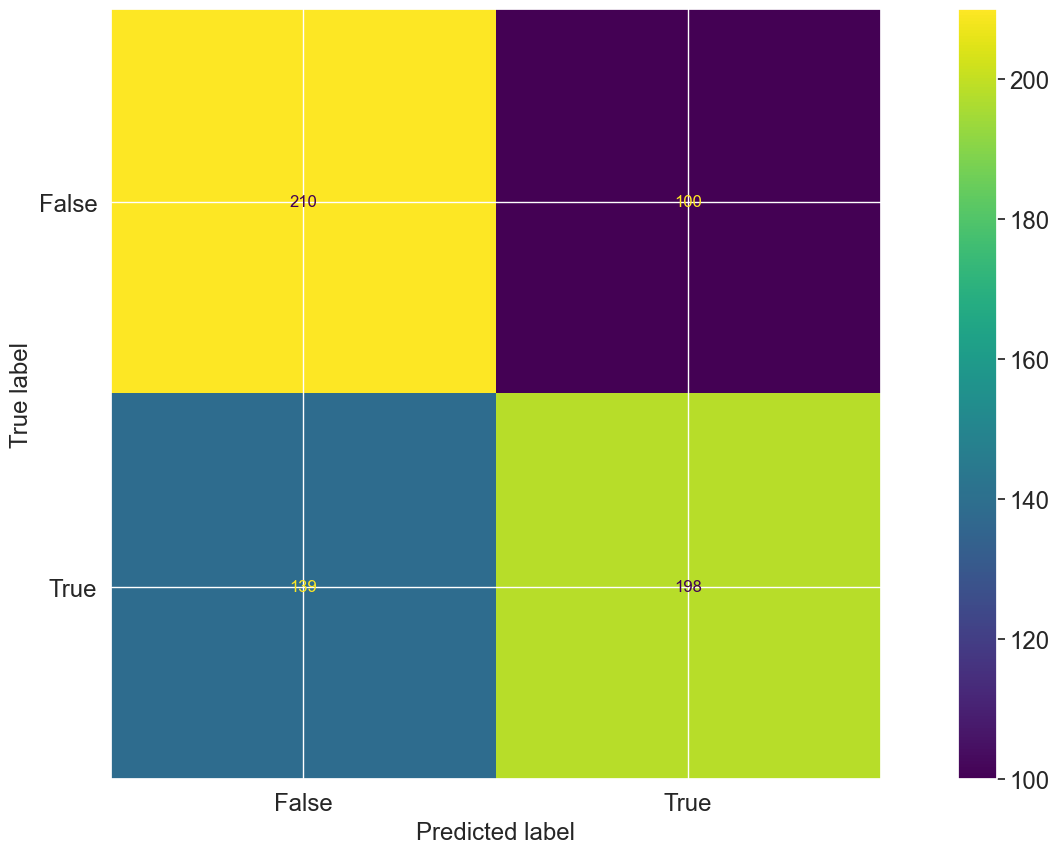

In [31]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Get the predicted classes
y_pred = log_reg.predict(vm_test_ds.x)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=[False, True]
)
cm_display.plot()

We will now create a @vm.test wrapper that will allow you to create a reusable test. Note the following changes in the code below:

- The function `confusion_matrix` takes two arguments `dataset` and `model`. This is a `VMDataset` and `VMModel` object respectively.
  - `VMDataset` objects allow you to access the dataset's true (target) values by accessing the `.y` attribute.
  - `VMDataset` objects allow you to access the predictions for a given model by accessing the `.y_pred()` method.
- The function docstring provides a description of what the test does. This will be displayed along with the result in this notebook as well as in the ValidMind platform.
- The function body calculates the confusion matrix using the `sklearn.metrics.confusion_matrix` function as we just did above.
- The function then returns the `ConfusionMatrixDisplay.figure_` object - this is important as the ValidMind framework expects the output of the custom test to be a plot or a table.
- The `@vm.test` decorator is doing the work of creating a wrapper around the function that will allow it to be run by the ValidMind framework. It also registers the test so it can be found by the ID `my_custom_tests.ConfusionMatrix` (see the section below on how test IDs work in ValidMind and why this format is important)


In [32]:
@vm.test("my_custom_tests.ConfusionMatrix")
def confusion_matrix(dataset, model):
    """The confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known.

    The confusion matrix is a 2x2 table that contains 4 values:

    - True Positive (TP): the number of correct positive predictions
    - True Negative (TN): the number of correct negative predictions
    - False Positive (FP): the number of incorrect positive predictions
    - False Negative (FN): the number of incorrect negative predictions

    The confusion matrix can be used to assess the holistic performance of a classification model by showing the accuracy, precision, recall, and F1 score of the model on a single figure.
    """
    y_true = dataset.y
    y_pred = dataset.y_pred(model=model)

    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix, display_labels=[False, True]
    )
    cm_display.plot()

    plt.close()  # close the plot to avoid displaying it

    return cm_display.figure_  # return the figure object itself

You can now run the newly created custom test on both the training and test datasets using the `run_test()` function:


In [33]:
# Training dataset
result = vm.tests.run_test(
    "my_custom_tests.ConfusionMatrix:training_dataset",
    inputs={"model": vm_model, "dataset": vm_train_ds},
)

In [34]:
# Test dataset
result = vm.tests.run_test(
    "my_custom_tests.ConfusionMatrix:test_dataset",
    inputs={"model": vm_model, "dataset": vm_test_ds},
)

<a id='toc6_2_'></a>

### Add parameters to custom tests

Custom tests can take parameters just like any other function. Let's modify the `confusion_matrix` function to take an additional parameter `normalize` that will allow you to normalize the confusion matrix.


In [35]:
@vm.test("my_custom_tests.ConfusionMatrix")
def confusion_matrix(dataset, model, normalize=False):
    """The confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known.

    The confusion matrix is a 2x2 table that contains 4 values:

    - True Positive (TP): the number of correct positive predictions
    - True Negative (TN): the number of correct negative predictions
    - False Positive (FP): the number of incorrect positive predictions
    - False Negative (FN): the number of incorrect negative predictions

    The confusion matrix can be used to assess the holistic performance of a classification model by showing the accuracy, precision, recall, and F1 score of the model on a single figure.
    """
    y_true = dataset.y
    y_pred = dataset.y_pred(model=model)

    if normalize:
        confusion_matrix = metrics.confusion_matrix(y_true, y_pred, normalize="all")
    else:
        confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix, display_labels=[False, True]
    )
    cm_display.plot()

    plt.close()  # close the plot to avoid displaying it

    return cm_display.figure_  # return the figure object itself

<a id='toc6_3_'></a>

### Pass parameters to custom tests

You can pass parameters to custom tests by providing a dictionary of parameters to the `run_test()` function. The parameters will override any default parameters set in the custom test definition. Note that `dataset` and `model` are still passed as `inputs`. Since these are `VMDataset` or `VMModel` inputs, they have a special meaning. When declaring a `dataset`, `model`, `datasets` or `models` argument in a custom test function, the Developer Framework will expect these get passed as `inputs` to `run_test()` (or `run_documentation_tests()` instead).

Re-running the confusion matrix with `normalize=True` looks like this:


In [36]:
# Test dataset with normalize=True
result = vm.tests.run_test(
    "my_custom_tests.ConfusionMatrix:test_dataset_normalized",
    inputs={"model": vm_model, "dataset": vm_test_ds},
    params={"normalize": True},
)

<a id='toc6_4_'></a>

### Log the confusion matrix results

As you saw in the pearson correlation example, you can log any result to the ValidMind platform with the `.log()` method of the result object. This will allow you to add the result to the documentation.

You can now do the same for the confusion matrix results.


In [37]:
result.log()

<a id='toc6_5_'></a>

### Using external test providers

Creating inline custom tests with a function is a great way to customize your model documentation. However, sometimes you may want to reuse the same set of tests across multiple models and share them with developers in your organization. In this case, you can create a custom test provider that will allow you to load custom tests from a local folder or a git repository.

In this section you will learn how to declare a local filesystem test provider that allows loading tests from a local folder following these high level steps:

1. Create a folder of custom tests from existing, inline tests (tests that exists in your active Jupyter notebook)
2. Save an inline test to a file
3. Define and register a `LocalTestProvider` that points to that folder
4. Run test provider tests
5. Add the test results to your documentation


<a id='toc6_5_1_'></a>

#### Create a folder of custom tests from existing inline tests

Here you will create a new folder that will contain reusable, custom tests. The following code snippet will create a new `my_tests` directory in the current working directory if it doesn't exist.


In [38]:
tests_folder = "my_tests"

import os

# create tests folder
os.makedirs(tests_folder, exist_ok=True)

# remove existing tests
for f in os.listdir(tests_folder):
    # remove files and pycache
    if f.endswith(".py") or f == "__pycache__":
        os.system(f"rm -rf {tests_folder}/{f}")

After running the command above, you should see a new directory next to this notebook file:

![screenshot showing my_tests directory](../images/my_tests_directory.png)


<a id='toc6_5_2_'></a>

#### Save an inline test to a file

The `@vm.test` decorator that was used above to register these as one-off custom tests also adds a convenience method to the function object that allows you to simply call `<func_name>.save()` to save it to a file. This will save the function to a Python file to a path you specify. In this case, you can pass the variable `tests_folder` to save it to the custom tests folder we created.

Normally, this will get you started by creating the file and saving the function code with the correct name. But it won't automatically add any import or other functions/variables outside of the function that are needed for the test to run. The `save()` method allows you to pass an optional `imports` argument that will ensure the necessary imports are added to the file.

For the `confusion_matrix` test, note the imports that are required for the function to run properly:

```python
import matplotlib.pyplot as plt
from sklearn import metrics
```

You can pass these imports to the `save()` method to ensure they are included in the file with the following command:


In [39]:
confusion_matrix.save(
    tests_folder,
    imports=["import matplotlib.pyplot as plt", "from sklearn import metrics"],
)

2024-06-12 16:28:17,053 - INFO(validmind.tests.decorator): Saved to /Users/beckchan/Documents/GitHub/validmind/developer-framework/notebooks/tutorials/my_tests/ConfusionMatrix.py!Be sure to add any necessary imports to the top of the file.
2024-06-12 16:28:17,054 - INFO(validmind.tests.decorator): This metric can be run with the ID: <test_provider_namespace>.ConfusionMatrix


##### What happened?

The `save()` method saved the `confusion_matrix` function to a file named `ConfusionMatrix.py` in the `my_tests` folder. Note that the new file provides some context on the origin of the test, which is useful for traceability.

```
# Saved from __main__.confusion_matrix
# Original Test ID: my_custom_tests.ConfusionMatrix
# New Test ID: <test_provider_namespace>.ConfusionMatrix
```

Additionally, the new test function has been stripped off its decorator, as it now resides in a file that will be loaded by the test provider:

```python
def ConfusionMatrix(dataset, model, normalize=False):
```


<a id='toc6_5_3_'></a>

#### Define and register a `LocalTestProvider` that points to that folder

With the `my_tests` folder now having a sample custom test, you can now initialize a test provider that will tell the Developer Framework where to find these tests. ValidMind offers out-of-the-box test providers for local tests (i.e. tests in a folder) or a Github provider for tests in a Github repository. You can also create your own test provider by creating a class that has a `load_test` method that takes a test ID and returns the test function matching that ID.

The most important attribute for a test provider is its `namespace`. This is a string that will be used to prefix test IDs in model documentation. This allows you to have multiple test providers with tests that can even share the same ID, but are distinguished by their namespace.

An extended introduction to test providers can be found in [this](../code_samples/custom_tests/integrate_external_test_providers.ipynb) notebook.

<a id='toc6_6_'></a>

### Initializing a local test provider

For most use-cases, the local test provider should be sufficient. This test provider allows you load custom tests from a designated directory. Let's go ahead and see how we can do this with our custom tests.


In [40]:
from validmind.tests import LocalTestProvider

# initialize the test provider with the tests folder we created earlier
my_test_provider = LocalTestProvider(tests_folder)

vm.tests.register_test_provider(
    namespace="my_test_provider",
    test_provider=my_test_provider,
)
# `my_test_provider.load_test()` will be called for any test ID that starts with `my_test_provider`
# e.g. `my_test_provider.ConfusionMatrix` will look for a function named `ConfusionMatrix` in `my_tests/ConfusionMatrix.py` file

<a id='toc6_6_1_'></a>

#### Run test provider tests

Now that you have set up the test provider, you can run any test that's located in the tests folder by using the `run_test()` method as with any other test. For tests that reside in a test provider directory, the test ID will be the `namespace` specified when registering the provider, followed by the path to the test file relative to the tests folder. For example, the Confusion Matrix test we created earlier will have the test ID `my_test_provider.ConfusionMatrix`. You could organize the tests in subfolders, say `classification` and `regression`, and the test ID for the Confusion Matrix test would then be `my_test_provider.classification.ConfusionMatrix`.

Let's go ahead and re-run the confusion matrix test by using the test ID `my_test_provider.ConfusionMatrix`. This should load the test from the test provider and run it as before.


In [41]:
result = vm.tests.run_test(
    "my_test_provider.ConfusionMatrix",
    inputs={"model": vm_model, "dataset": vm_test_ds},
    params={"normalize": True},
)

result.log()

<a id='toc6_6_2_'></a>

#### Add the test results to your documentation

You have already seen how to add individual results to the model documentation using the platform. Let's repeat the process and add the confusion matrix to the `Model Development` -> `Model Evaluation` section of the documentation. The "add test driven block" dialog should now show the new test result coming from the test provider:

![screenshot showing confusion matrix result](../images/insert-test-driven-block-custom-confusion-matrix.png)


<a id='toc7_'></a>

## 4. Finalize testing and documentation

In this section we cover how to finalize the testing and documentation of your model by focusing on:

1. Using `run_documentation_tests()` to ensure custom test results are included in your documentation
2. Viewing and updating the configuration for the entire model documentation template


<a id='toc7_1_'></a>

### Use `run_documentation_tests()` to ensure custom test results are included in your documentation

After adding test driven blocks to your model documentation, changes should persist and become available every time you call `vm.preview_template()`. However, you need to reload the connection to the ValidMind platform if you have added test driven blocks when the connection was already established.


In [42]:
vm.reload()

Now, run `preview_template()` and verify that the new confusion matrix test you added is included in the proper section.


In [43]:
vm.preview_template()

Accordion(children=(Accordion(children=(HTML(value='<p>Empty Section</p>'), Accordion(children=(HTML(value='<p…

Since the test ID is now registered in the document you can now run tests for an entire section and all additional custom tests should be loaded without issues. Let's run all tests in the `model_evaluation` section of the documentation. Note that we have been running the sample custom confusion matrix with `normalize=True` to demonstrate the ability to provide custom parameters.

In the `Run the model evaluation tests` section above you learned how to assign inputs to individual tests with `run_documentation_tests()`. Assigning parametesr is similar, you only need to provide assign a `params` dictionary to a given test ID, `my_test_provider.ConfusionMatrix` in this case.


In [44]:
test_config = {
    "validmind.model_validation.sklearn.ClassifierPerformance:in_sample": {
        "inputs": {
            "dataset": vm_train_ds,
            "model": vm_model,
        },
    },
    "my_test_provider.ConfusionMatrix": {
        "params": {"normalize": True},
    },
}
results = vm.run_documentation_tests(
    section=["model_evaluation"],
    inputs={
        "dataset": vm_test_ds,  # Any test that requires a single dataset will use vm_test_ds
        "model": vm_model,
        "datasets": (
            vm_train_ds,
            vm_test_ds,
        ),  # Any test that requires multiple datasets will use vm_train_ds and vm_test_ds
    },
    config=test_config,
)

2024-06-12 16:28:18,447 - WARNING(validmind.vm_models.test_suite.runner): Config key 'my_test_provider.ConfusionMatrix' does not match a test_id in the template.
	Ensure you registered a content block with the correct content_id in the template
	The configuration for this test will be ignored.


/Users/beckchan/Library/Caches/pypoetry/virtualenvs/validmind-PDdiQnuU-py3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



<a id='toc7_2_'></a>

### Viewing and updating the configuration for the entire model documentation template

The Developer Framework provides a utility function called `vm.get_test_suite().get_default_config()` that allows you to render the default configuration for the entire documentation template. This configuration will contain all the test IDs and their default parameters. You can then modify this configuration as needed and pass it to `run_documentation_tests()` to run all tests in the documentation template if needed. You also have the option to continue running tests for one section at a time, `get_default_config()` still provides a useful reference for providing default parametes to every test.


In [45]:
import json

project_test_suite = vm.get_test_suite()
config = project_test_suite.get_default_config()
print("Suite Config: \n", json.dumps(config, indent=2))

Suite Config: 
 {
  "validmind.data_validation.DatasetDescription": {
    "inputs": {
      "dataset": null
    },
    "params": {}
  },
  "validmind.data_validation.ClassImbalance": {
    "inputs": {
      "dataset": null
    },
    "params": {
      "min_percent_threshold": 10
    }
  },
  "validmind.data_validation.Duplicates": {
    "inputs": {
      "dataset": null
    },
    "params": {
      "min_threshold": 1
    }
  },
  "validmind.data_validation.HighCardinality": {
    "inputs": {
      "dataset": null
    },
    "params": {
      "num_threshold": 100,
      "percent_threshold": 0.1,
      "threshold_type": "percent"
    }
  },
  "validmind.data_validation.MissingValues": {
    "inputs": {
      "dataset": null
    },
    "params": {
      "min_threshold": 1
    }
  },
  "validmind.data_validation.Skewness": {
    "inputs": {
      "dataset": null
    },
    "params": {
      "max_threshold": 1
    }
  },
  "validmind.data_validation.UniqueRows": {
    "inputs": {
      "dat

<a id='toc7_2_1_'></a>

#### Update the config

Note that the default config does not assign any inputs to a test, this is expected. You can assign inputs to individual tests as needed, depending on the datasets and models you want to pass to individual tests. The `config` dictionary, as a mapping of test IDs to test configurations, allows you to do this.

For this particular documentation template (binary classification), the Developer Framework provides a sample configuration that can be used to populate the entire model documentation using the following inputs as placeholders:

- A `raw_dataset` raw dataset
- A `train_dataset` training dataset
- A `test_dataset` test dataset
- A trained `model` instance

As part of updating the `config` you will need to ensure the correct `input_id`s are used in the final config passed to `run_documentation_tests()`.


In [46]:
from validmind.datasets.classification import customer_churn
from validmind.utils import preview_test_config

test_config = customer_churn.get_demo_test_config()
preview_test_config(test_config)

Using this sample configuration, let's finish populating model documentation by running all tests for the `model_development` section of the documentation. Recall that the training and test datasets in our exercise have the following `input_id` values:

- `train_dataset_final` for the training dataset
- `test_dataset_final` for the test dataset


In [47]:
config = {
    "validmind.model_validation.ModelMetadata": {
        "inputs": {"model": "log_reg_model_v1"},
    },
    "validmind.data_validation.DatasetSplit": {
        "inputs": {"datasets": ["train_dataset_final", "test_dataset_final"]},
    },
    "validmind.model_validation.sklearn.PopulationStabilityIndex": {
        "inputs": {
            "model": "log_reg_model_v1",
            "datasets": ["train_dataset_final", "test_dataset_final"],
        },
        "params": {"num_bins": 10, "mode": "fixed"},
    },
    "validmind.model_validation.sklearn.ConfusionMatrix": {
        "inputs": {"model": "log_reg_model_v1", "dataset": "test_dataset_final"},
    },
    "my_test_provider.ConfusionMatrix": {
        "inputs": {"dataset": "test_dataset_final", "model": "log_reg_model_v1"},
    },
    "validmind.model_validation.sklearn.ClassifierPerformance:in_sample": {
        "inputs": {"model": "log_reg_model_v1", "dataset": "train_dataset_final"}
    },
    "validmind.model_validation.sklearn.ClassifierPerformance:out_of_sample": {
        "inputs": {"model": "log_reg_model_v1", "dataset": "test_dataset_final"}
    },
    "validmind.model_validation.sklearn.PrecisionRecallCurve": {
        "inputs": {"model": "log_reg_model_v1", "dataset": "test_dataset_final"},
    },
    "validmind.model_validation.sklearn.ROCCurve": {
        "inputs": {"model": "log_reg_model_v1", "dataset": "test_dataset_final"},
    },
    "validmind.model_validation.sklearn.TrainingTestDegradation": {
        "inputs": {
            "model": "log_reg_model_v1",
            "datasets": ["train_dataset_final", "test_dataset_final"],
        },
        "params": {
            "metrics": ["accuracy", "precision", "recall", "f1"],
            "max_threshold": 0.1,
        },
    },
    "validmind.model_validation.sklearn.MinimumAccuracy": {
        "inputs": {"model": "log_reg_model_v1", "dataset": "test_dataset_final"},
        "params": {"min_threshold": 0.7},
    },
    "validmind.model_validation.sklearn.MinimumF1Score": {
        "inputs": {"model": "log_reg_model_v1", "dataset": "test_dataset_final"},
        "params": {"min_threshold": 0.5},
    },
    "validmind.model_validation.sklearn.MinimumROCAUCScore": {
        "inputs": {"model": "log_reg_model_v1", "dataset": "test_dataset_final"},
        "params": {"min_threshold": 0.5},
    },
    "validmind.model_validation.sklearn.PermutationFeatureImportance": {
        "inputs": {"model": "log_reg_model_v1", "dataset": "test_dataset_final"},
    },
    "validmind.model_validation.sklearn.SHAPGlobalImportance": {
        "inputs": {"model": "log_reg_model_v1", "dataset": "test_dataset_final"},
        "params": {"kernel_explainer_samples": 10},
    },
    "validmind.model_validation.sklearn.WeakspotsDiagnosis": {
        "inputs": {
            "model": "log_reg_model_v1",
            "datasets": ["train_dataset_final", "test_dataset_final"],
        },
        "params": {
            "thresholds": {"accuracy": 0.75, "precision": 0.5, "recall": 0.5, "f1": 0.7}
        },
    },
    "validmind.model_validation.sklearn.OverfitDiagnosis": {
        "inputs": {
            "model": "log_reg_model_v1",
            "datasets": ["train_dataset_final", "test_dataset_final"],
        },
        "params": {"cut_off_percentage": 4},
    },
    "validmind.model_validation.sklearn.RobustnessDiagnosis": {
        "inputs": {
            "model": "log_reg_model_v1",
            "datasets": ["train_dataset_final", "test_dataset_final"],
        },
        "params": {
            "scaling_factor_std_dev_list": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
            "accuracy_decay_threshold": 4,
        },
    },
}


full_suite = vm.run_documentation_tests(
    section="model_development",
    config=config,
)

2024-06-12 16:28:23,699 - WARNING(validmind.vm_models.test_suite.runner): Config key 'my_test_provider.ConfusionMatrix' does not match a test_id in the template.
	Ensure you registered a content block with the correct content_id in the template
	The configuration for this test will be ignored.


/Users/beckchan/Library/Caches/pypoetry/virtualenvs/validmind-PDdiQnuU-py3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/Users/beckchan/Library/Caches/pypoetry/virtualenvs/validmind-PDdiQnuU-py3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/Users/beckchan/Library/Caches/pypoetry/virtualenvs/validmind-PDdiQnuU-py3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



<a id='toc8_'></a>

## Where to go from here

In this notebook you have learned the end-to-end process to document a model with the ValidMind Developer Framework, running through some very common scenarios in a typical model development setting:

- Running out-of-the-box tests
- Documenting your model by adding evidence to model documentation
- Extending the capabilities of the Developer Framework by implementing custom tests
- Ensuring that the documentation is complete by running all tests in the documentation template

As a next step, you can explore the following notebooks to get a deeper understanding on how the developer framework allows you generate model documentation for any use case:

<a id='toc8_1_'></a>

### Use cases

- [Application scorecard demo](../code_samples/credit_risk/application_scorecard_demo.ipynb)
- [Linear regression documentation demo](../code_samples/regression/quickstart_regression_full_suite.ipynb)
- [LLM model documentation demo](../code_samples/nlp_and_llm/foundation_models_integration_demo.ipynb)

<a id='toc8_2_'></a>

### More how-to guides and code samples

- [Explore available tests in detail](../how_to/explore_tests.ipynb)
- [In-depth guide for implementing custom tests](../code_samples/custom_tests/implement_custom_tests.ipynb)
- [In-depth guide to external test providers](../code_samples/custom_tests/integrate_external_test_providers.ipynb)
- [Configuring dataset features](../how_to/configure_dataset_features.ipynb)
- [Introduction to unit and composite metrics](../how_to/run_unit_metrics.ipynb)

<a id='toc8_3_'></a>

### Discover more learning resources

All notebook samples can be found in the following directories of the Developer Framework GitHub repository:

- [Code samples](https://github.com/validmind/developer-framework/tree/main/notebooks/code_samples)
- [How-to guides](https://github.com/validmind/developer-framework/tree/main/notebooks/how_to)
